<h1 align = center>Introduction</h1><br>
<b>The task is</b> to obtain a power spectral density (PSD) from a signal, and to simulate random signals that have the same PSD.<br>
<b>The method is</b> to turn an original PSD into a frequency filter, to generate random noise, to filter that noise through the filter. An inverse Fourier transform then results in a simulated signal.<br>
<b>The trick is</b> to allow for simulating homoscedastic non-stationary processes, which are the processes that have constant (or near constant) variance but varying mean value. I am trying an idea with a <b>very simple example</b>: signal is a sum of a sinusoid and a line, I extract this line by calculating a trend line, substract this line, simulate, add the line back.

<h1 align = center>Shaping filteres single</h1>

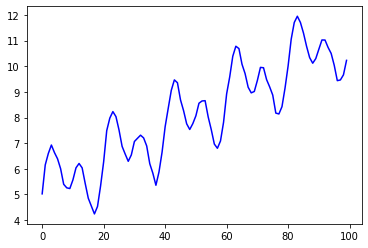

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.fft import ifft

# Period
T = 2 * np.pi
# Number of sample points
N = 100
# Linspace
t = np.linspace(0.0, T, N, endpoint=False)
# Original signal
# This signal is homoscedastic non-stationary - its mean changes but variance doesn't
input_sig = np.sin(5*t) + np.sin(10*t) + t + 5 + np.random.normal(0, 0.1, N)
# Drawing
plt.plot(input_sig, 'b')

max error:  9.094947017729282e-13
mean error:  4.591401911446802e-14


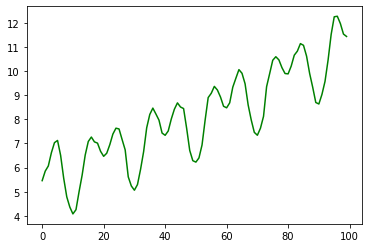

In [98]:
# We are going to turn the signal into a properly stationary one
# by fitting a line to a series and getting its slope
slope, intercept = np.polyfit(t, input_sig, 1)
for i in range(N):
    input_sig[i] -= slope * t[i] #+ intercept

# Then we're going to simulate signal as if it is totally stationary
# Fourier transform
input_ft = fft(input_sig)
# PSD
input_psd = abs(input_ft)**2
# Creating noise
noise = np.random.normal(0, 1, N)
noise_ft = fft(noise)
# using noise as a filter to create a simulated signal's FT
output_ft = np.sqrt(input_psd) * np.sign(noise_ft.real)
output_signal = ifft(output_ft).real # SIMULATED SIGNAL

# Checking accuracy - comparing input and output PSD
output_ft2 = fft(output_signal) #is not neccessary and works the same
output_psd = abs(output_ft2)**2
print("max error: ", max(abs(output_psd - input_psd)))
print("mean error: ", np.mean(abs(output_psd - input_psd)))

# Now it's time to add the line back
for i in range(N):
    output_signal[i] += slope * t[i] #+ intercept
plt.plot(output_signal, 'g')